<a href="https://colab.research.google.com/github/Pv01energ/pv01/blob/main/_titanic_coursera_yandex_ds_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sklearn.tree as st

In [ ]:
# загружаем датасет (data)
from google.colab import files 
uploaded = files.upload()
dt = pd.read_csv('titanic.csv')

Saving titanic.csv to titanic.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pd.read_csv("titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
selected_data = titanic[["Pclass" , "Fare", "Age", "Sex", "Survived"]].copy()
selected_data.loc[:, "Sex"]  = selected_data.loc[:, "Sex"].replace({'male' : 1, "female" : 0})
print(selected_data.shape)
# selected_data["Age"].isna().value_counts()
selected_data = selected_data.dropna()
print(selected_data.shape)
training_set = selected_data[["Pclass" , "Fare", "Age", "Sex"]]
target_values = selected_data["Survived"]

(891, 5)
(714, 5)


In [ ]:
classifier = st.DecisionTreeClassifier(random_state=241)
tree = classifier.fit(training_set.values, target_values.values)

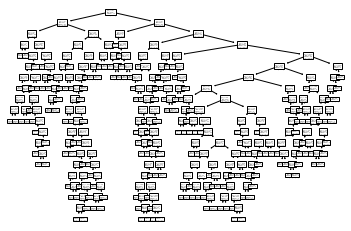

In [ ]:
st.plot_tree(tree)
plt.savefig("tree.pdf", format="pdf")

In [ ]:
tree.feature_importances_
print(selected_data,tree.feature_importances_)

     Pclass     Fare   Age  Sex  Survived
0         3   7.2500  22.0    1         0
1         1  71.2833  38.0    0         1
2         3   7.9250  26.0    0         1
3         1  53.1000  35.0    0         1
4         3   8.0500  35.0    1         0
..      ...      ...   ...  ...       ...
885       3  29.1250  39.0    0         0
886       2  13.0000  27.0    1         0
887       1  30.0000  19.0    0         1
889       1  30.0000  26.0    1         1
890       3   7.7500  32.0    1         0

[714 rows x 5 columns] [0.14000522 0.30343647 0.2560461  0.30051221]


In [ ]:
print(list(zip(tree.feature_importances_)))

[(0.1400052185312419,), (0.3034364695314525,), (0.2560461009790662,), (0.30051221095823943,)]
